### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud

C:\Users\varun\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Reading Data

In [3]:
path = "E:\IV year\Masters Files\Wichita State University\Sem 1\Subjects\Applied Practical Data Science\Project\ml-latest-small\\"

movies_data = pd.read_csv(path + 'movies.csv')

ratings_data = pd.read_csv(path + 'ratings.csv')

movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies_data.shape

(9742, 3)

In [6]:
ratings_data.shape

(100836, 4)

### Final Dataset

Merging Movie Dataset with Ratings dataset

In [7]:
df = pd.merge(ratings_data,movies_data,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
#Checking the shape of the data
df.shape

(100836, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


### Data Cleaning

In [10]:
#Dropping Null Values from dataset
df = df.dropna()

In [11]:
#Checking for null values
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [12]:
#Dropping duplicate values
df=df.drop_duplicates()
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [13]:
#Checking for distinct genre categories in dataset
df.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Mystery|Thriller',
       'Crime|Mystery|Thriller', 'Action|Comedy|Horror|Thriller',
       'Adventure|Comedy|Crime|Romance', 'Action|Drama|War',
       'Action|Drama|Romance|War', 'Comedy|War', 'Action|Romance|Western',
       'Comedy', 'Adventure|Comedy', 'Comedy|Drama',
       'Action|Adventure|Sci-Fi', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Adventure|Children|Romance', 'Action|Comedy|Crime|Fantasy',
       'Action|Thriller', 'Thriller', 'Action|Adventure|Sci-Fi|Thriller',
       'Drama|War', 'Comedy|Romance|Thriller',
       'Action|Adventure|Comedy|Romance', 'Action|Drama|Western',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Animation|Children|Fantasy|Musical',
       'Action|Adventure|Mystery|Thriller',
       'Adventure|Animation|Children|Fantasy|Musical',
       'Adventure|Animation|Chil

In [14]:
#Creating a list of genres
total_genres = []

for g in df.genres:
    g = g.split('|') ## spliting every generes from '|'
    ## checking if the genre is not present in the list 
    if g not in total_genres:
        total_genres.append(g)

In [15]:
#Creating a list to extract titles adn released year
year, title = [], []
for t in df.title:
    title.append(t[:-7])
    year.append(t[-7:])

### EDA

In [16]:
#Plotting using word cloud for movie genres and title

word_cloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2 ,
                        min_word_length=3).generate(str(total_genres))

word_cloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2 ,
                        min_word_length=3).generate(str(title))

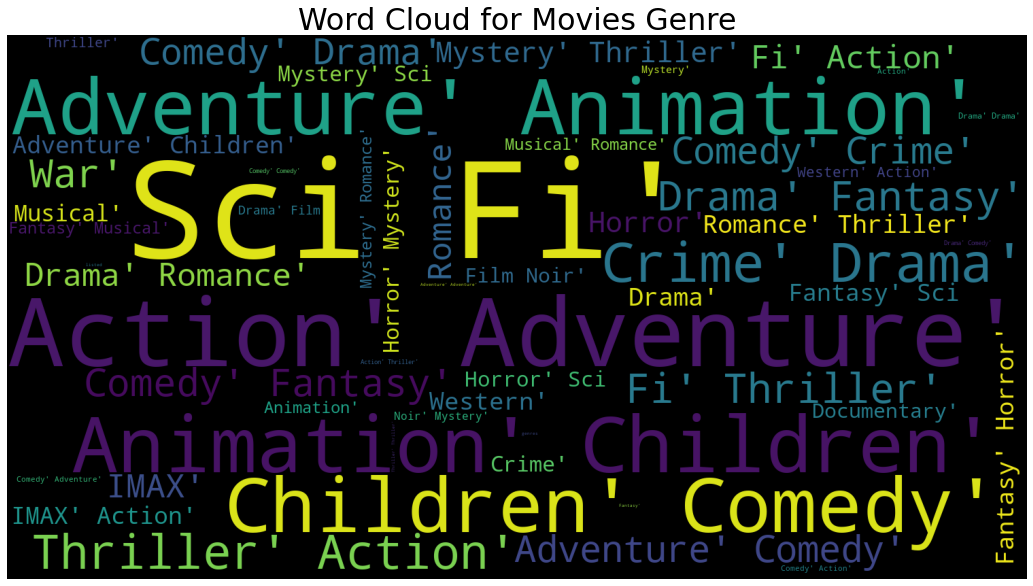

In [17]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

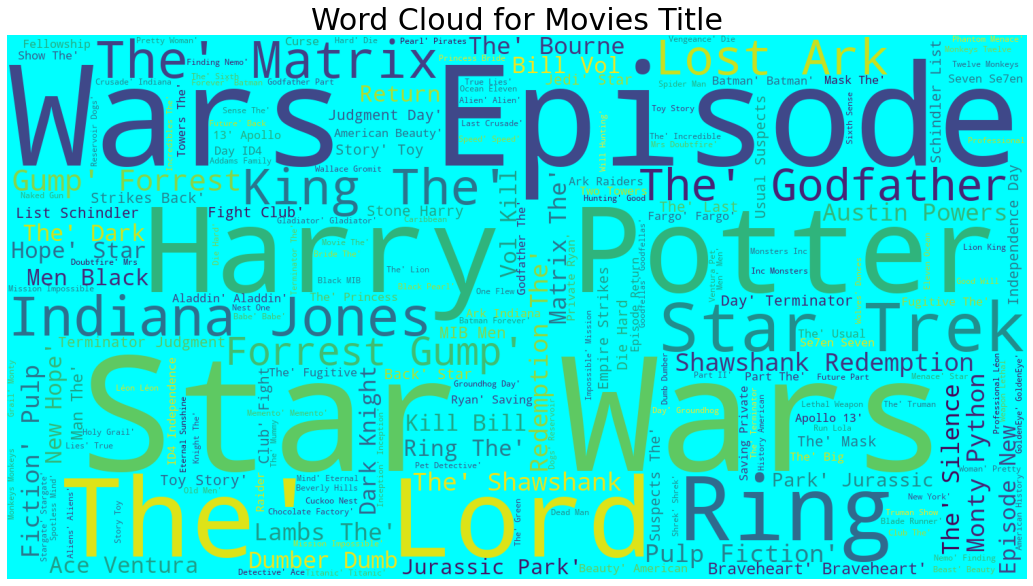

In [18]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

In [19]:
#Dislplaying top 10 popular movies
title_rating = df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1404.0
Forrest Gump (1994),1370.0
Pulp Fiction (1994),1288.5
"Matrix, The (1999)",1165.5
"Silence of the Lambs, The (1991)",1161.0


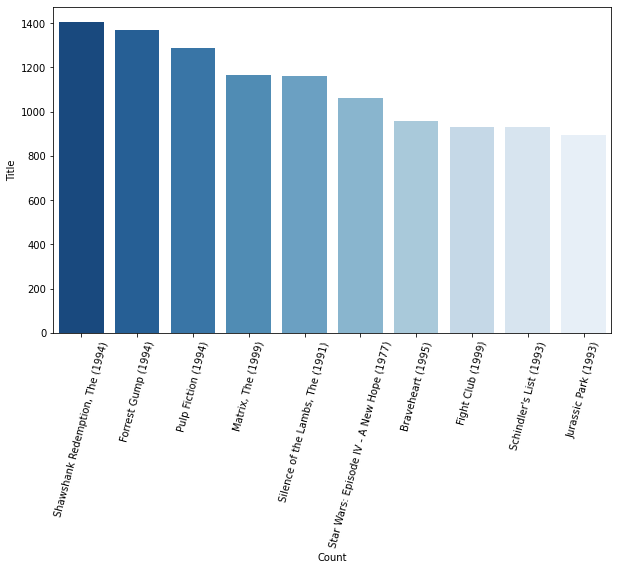

In [20]:
#Top 10 Highly popular movies
plt.figure(figsize=(10, 6))
plt.xticks(rotation=75);
sns.barplot(data=title_rating, x=title_rating.index, y='rating',palette='Blues_r');
plt.ylabel('Title');
plt.xlabel('Count');

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

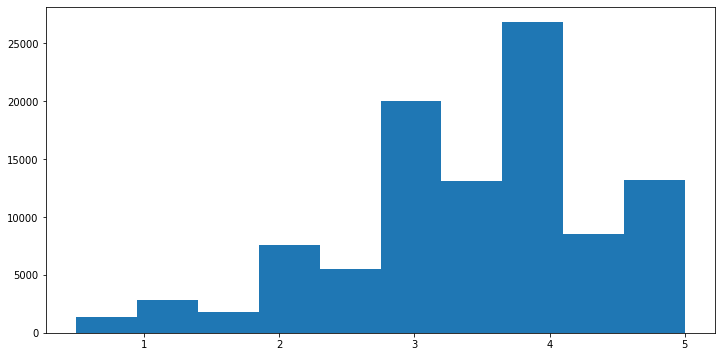

In [21]:
#Histogram plot for ratings 
f,ax = plt.subplots(1,1,figsize=(12,6))
plt.hist(data = df, x='rating',bins=10)

In [22]:
#Creating a dataframe from year list to add it to final dataframe
year_df = pd.DataFrame(year,columns=['Released Year'])

In [23]:
year_df['Released Year'].unique()

array([' (1995)', ' (1996)', ' (1994)', ' (1977)', ' (1993)', ' (1990)',
       ' (1989)', ' (1991)', ' (1940)', ' (1939)', ' (1941)', ' (1938)',
       ' (1947)', ' (1975)', ' (1968)', ' (1945)', ' (1963)', ' (1971)',
       ' (1951)', ' (1979)', ' (1992)', ' (1986)', ' (1982)', ' (1980)',
       ' (1987)', ' (1981)', ' (1983)', ' (1960)', ' (1952)', ' (1984)',
       ' (1933)', ' (1985)', ' (1974)', ' (1922)', ' (1997)', ' (1998)',
       ' (1930)', ' (1976)', ' (1942)', ' (1967)', ' (1959)', ' (1946)',
       ' (1978)', ' (1973)', ' (1988)', ' (1999)', ' (1931)', ' (1964)',
       ' (1962)', ' (1965)', ' (1969)', ' (2000)', ' (1970)', ' (2003)',
       ' (2004)', ' (2006)', ' (2008)', ' (2009)', ' (2010)', ' (2011)',
       ' (2012)', ' (2013)', ' (2014)', ' (2015)', ' (1955)', ' (2002)',
       ' (1961)', ' (1954)', ' (1957)', ' (1943)', ' (1956)', ' (1966)',
       ' (2001)', ' (1937)', ' (1972)', ' (2005)', ' (1950)', ' (2007)',
       ' (2016)', ' (1926)', ' (1944)', ' (1949)', 

From the above values we can observe that year column contains string values and needs to be removed.

In [24]:
#Extracting only numnerical values from the year list and replacing other values with NaN
year_df['Released Year'] = year_df['Released Year'].str.extract(r'(\(.*?)\)', expand=False).str.strip()
year_df['Released Year'] = year_df['Released Year'].str.replace("(","") 

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
year_df['Released Year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', nan, '1934',
       '1916', '1908', '1932', '1921', '1925', '1929', '1917', '1915',
       '1924', '1903', '1919'], dtype=object)

In [26]:
#Adding feature released year using year datframe and merging in the final dataframe
df['released_year'] = year_df['Released Year']

In [27]:
#Dropping null values from the dataframe
df=df.dropna()

In [28]:
#Checking the shape of data after removing null values
df.shape

(100818, 7)

**Removing Noise from the data**


In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account.

So with all that taken into account and some trial and error experimentations,  we will reduce the noise by adding some filters for the final dataset.

To qualify a movie, a minimum of 10 users should have voted a movie.
To qualify a user, a minimum of 50 movies should have voted by the user.

In [29]:
#Aggregating the number of users who voted and the number of movies that were voted.
no_user_voted = df.groupby('movieId')['rating'].agg('count')
no_movies_voted = df.groupby('userId')['rating'].agg('count')

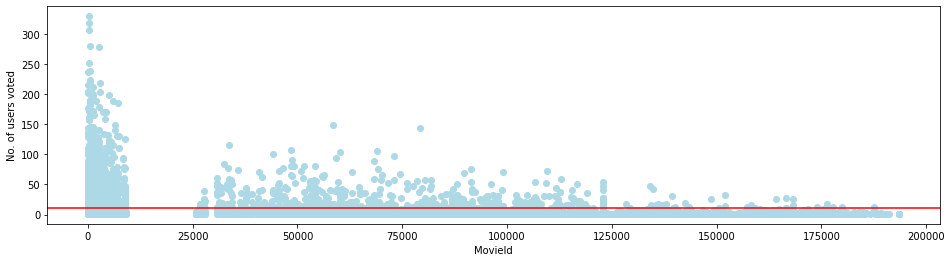

In [36]:
#Let’s visualize the number of users who voted with our threshold of 10.
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='lightblue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

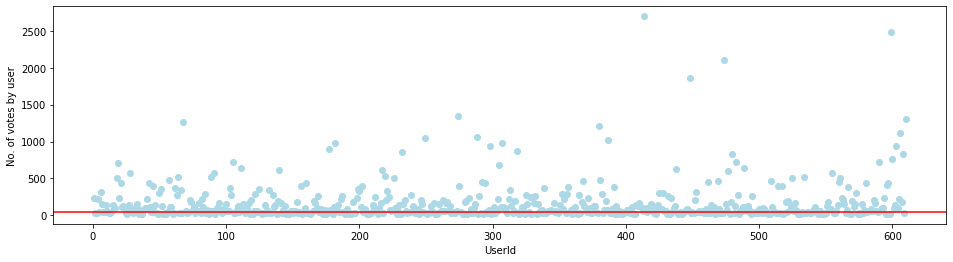

In [37]:
#Let’s visualize the number of votes by each user with our threshold of 50.
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='lightblue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [38]:
#Total Rating count for each movie
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [39]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,released_year,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215


In [40]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9706.000
mean      10.387
std       22.419
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [41]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,timestamp,title,genres,released_year,totalRatingCount
0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
1,5,1,4.000,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
2,7,1,4.500,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
3,15,1,2.500,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215
4,17,1,4.500,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,215


In [42]:
rating_popular_movie.shape

(41362, 8)

Here, we can see that userId 603 has watched movieId 1 & 3 and rated both of them 4.0 but has not rated movieId 2 at all. This interpretation is harder to extract from this dataframe. Therefore, to make things easier to understand and work with, we are going to make a new dataframe where each column would represent each unique userId and each row represents each unique movie title.

Let’s fix this and impute NaN with 0 to make things understandable for the algorithm and also making the data more clean.

In [62]:
## First lets create a Pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


Lets build recommendation engine now

- We will use a neighbour based collaborative filtering model. 
- The idea is to use k-nearest neighbour algorithm to find neighbours of a user

We will represent movies watched by a user in a vector - the vector will have values for all the movies in our dataset.
If a user hasn't rated a movie, it would be represented as 0.

### Model Building and Training

In [44]:
from scipy.sparse import csr_matrix

from sklearn.neighbors import NearestNeighbors

movie_features_df_matrix = csr_matrix(movie_features_df.values)

NearestNeighbors(algorithm='brute', metric='cosine')

Our final_dataset has dimensions of 450 * 606 where most of the values are sparse. We are using only a small dataset but for the original large dataset of movie lens which has more than 100000 features, our system may run out of computational resources when that is feed to the model. To reduce the sparsity we use the csr_matrix function from the scipy library.

We will be using the KNN algorithm to compute similarity with cosine distance metric which is very fast and more preferable than pearson coefficient

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

In [45]:
movie_features_df.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]])

In [46]:
movie_features_df.shape

(450, 606)

### Movie Recommendation Function

The working principle is very simple. We first check if the movie name input is in the database and if it is we use our recommendation system to find similar movies and sort them based on their similarity distance and output only the top 5 movies with their distances from the input movie.

In [60]:
def get_movie_recommendation(movie_name):
    movie_list = movie_features_df[movie_features_df.index.str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.index
        distances, indices = model_knn.kneighbors(movie_features_df.loc[movie_idx,:].values.reshape(1, -1), n_neighbors = 6)
        
        movie_rec=[]

        for i in range(0, len(distances.flatten())):
            if i == 0:
                print('Recommendations for Movie {0}:\n'.format(movie_idx.values[0]))
            else:
                print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
                movie_rec.append(movie_features_df.index[indices.flatten()[i]])
        return movie_rec
    else:
        return "No Movie Found"


In [61]:
get_movie_recommendation('Iron Man')

Recommendations for Movie Iron Man (2008):

1: Dark Knight, The (2008), with distance of 0.32946219051576764:
2: WALL·E (2008), with distance of 0.3322251199632066:
3: Avengers, The (2012), with distance of 0.3413244923996469:
4: Avatar (2009), with distance of 0.3757322316601438:
5: Batman Begins (2005), with distance of 0.4029287417301053:


['Dark Knight, The (2008)',
 'WALL·E (2008)',
 'Avengers, The (2012)',
 'Avatar (2009)',
 'Batman Begins (2005)']

The results seems to be pretty good. All the movies at the top are superhero or animation movies which are ideal for kids as is the input movie “Iron Man”.

From the above results we can observe that our model is recommending movies based on the input movie and having cosine distance similar to the given movie.


Our model works quite well- a movie recommendation system based on user behavior. Hence, we conclude our collaborative filtering here. 

**Romance versus Science Fiction**

We will start by considering a subset of users and discovering what are their favourite genre. We will do this by defining a function that will calculate each user’s average rating for all science fiction and romance movies.

In [64]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratings_data, movies_data, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.310,4.220
2,4.500,3.880
3,0.500,4.200
4,3.380,2.830
5,3.090,2.500


In order to have a more delimited subset of people to study, we are going to bias our grouping to only get ratings from those users that like either romance or science fiction movies.

In [65]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.500,4.200
1,4,3.380,2.830
2,5,3.090,2.500
3,7,2.650,3.150
4,9,3.170,3.000


We can see that there are 163 number of records ,and for each one, there is a rating for a romance and science fiction movie.

Now, we will make some Visualization Analysis in order to obtain a good overview of the biased dataset and its characteristics.

     level_0  index  avg_romance_rating  avg_scifi_rating  group
0          0      3               0.500             4.200      1
1          1      4               3.380             2.830      2
2          2      5               3.090             2.500      2
3          3      7               2.650             3.150      2
4          4      9               3.170             3.000      2
..       ...    ...                 ...               ...    ...
157      157    600               3.000             2.940      2
158      158    608               2.890             3.300      2
159      159    609               3.200             3.000      2
160      160      1               4.310             4.220      0
161      161      2               4.500             3.880      0

[162 rows x 5 columns]


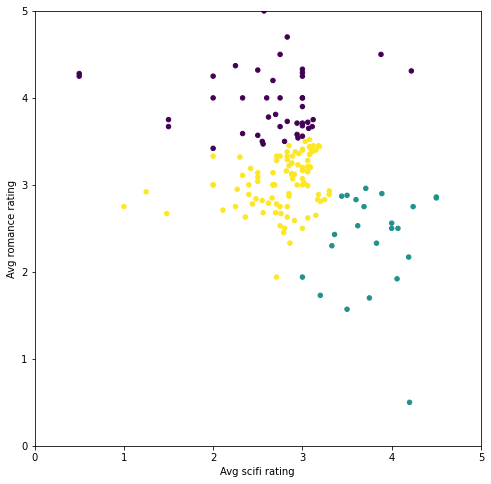

In [73]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find three clusters
kmeans_1 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    print(clustered)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
draw_clusters(biased_dataset, predictions)

It is evident that the grouping logic is based on how each person rated romance movies. People that averaged a rating on romance movies of 3 or higher will belong to one group, and people who averaged a rating of less than 3 will belong to the other.

It is evident now that the science-fiction rating has started to come into play:

* People who like sci-fi and romance belong to the purple group.
* People who like sci-fi but not romance belong to the yellow group.
* People who like romance but not sci-fi belong to the green group.

From this analysis we can realize that the more groups we split our datset into, the more similar are the preferences of the people that belong to each group.

In [35]:
#Importing Pickle for dumping required data and to be used in deployment using streamlit
import pickle

In [51]:
pickle.dump(movies_data, open('movies_data.pkl','wb'))

In [52]:
pickle.dump(final_dataset, open('final_dataset.pkl','wb'))

In [53]:
pickle.dump(csr_data, open('csr_data.pkl','wb'))

In [75]:
pickle.dump(movies_data.to_dict(), open('movies_dict.pkl','wb'))

In [239]:
pickle.dump(movie_features_df, open('movie_features_df.pkl','wb'))

In [238]:
pickle.dump(movie_features_df_matrix, open('movie_features_df_matrix.pkl','wb'))

### Conclusion 

We have built a movie recommendation engine using k-nearest neighbour algorithm implemented it.

* Open app.py file from ide and run the following command 'streamlit run app.py' to deploy streamlit app and start recommendation.

In [76]:
df.to_csv('movies_dataset.csv')

In [77]:
df.to_csv('title_rating.csv')